**ML - Fall 2023 - Practical 4**

**Support Vector Machine**

**Student Name:**  Amirhossein Alamdar<br>
**Student Number:** 400105144

# P0: Intro

Sentiment Analysis is a Natural Language Processing technique that allows us to determine the sentiment or opinion of a given text. It is a very useful technique that allows us to extract insights from social media, customer feedback, product reviews, etc. This assignment focuses on building a sentiment classifier using the SVM algorithm. You are given a dataset of tweets along with their corresponding sentiments. Your task is to build a classifier that can determine the sentiment of a given tweet.

# P1: Data Exploration

The dataset provided to you includes one file: `sentiment.csv`.
Run the below cells to download the data.

In [1]:
!pip install gdown

In [2]:
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1XHeTYh-jGBHq1lpbOVq1HX-N4EsUIQgA'
path = 'sentiment.csv'
gdown.download(url, path, quiet=True)
data = pd.read_csv(path, encoding = "ISO-8859-1")
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## The Distribution of Labels

Extract the labels of the Sentiment column and plot the distribution of samples according to it. **(P1-1: 2.5 points)**

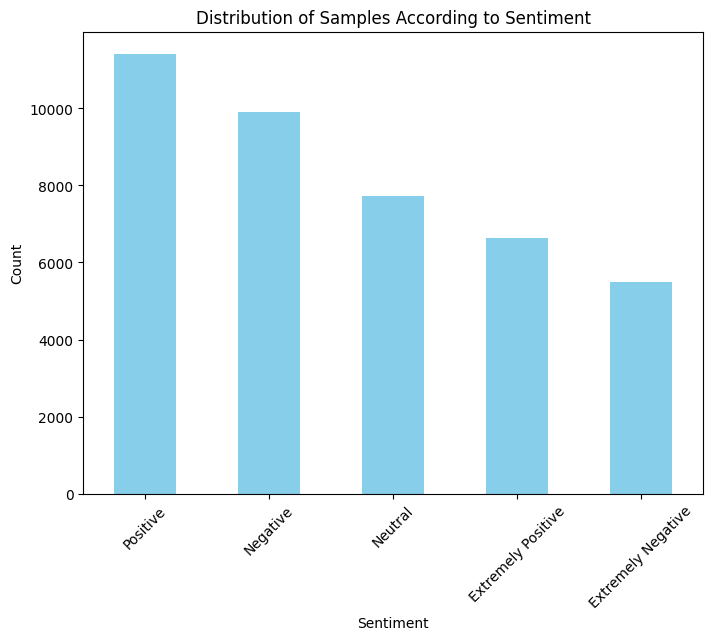

In [3]:
import matplotlib.pyplot as plt

sentiment_column = 'Sentiment'

# Extract the labels of the Sentiment column
sentiment_labels = data[sentiment_column]

# Plot the distribution of samples according to sentiment
sentiment_counts = sentiment_labels.value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Samples According to Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Texts Distribution

Plot the distribution of tweets according to their lengths. **(P1-2: 2.5 points)**

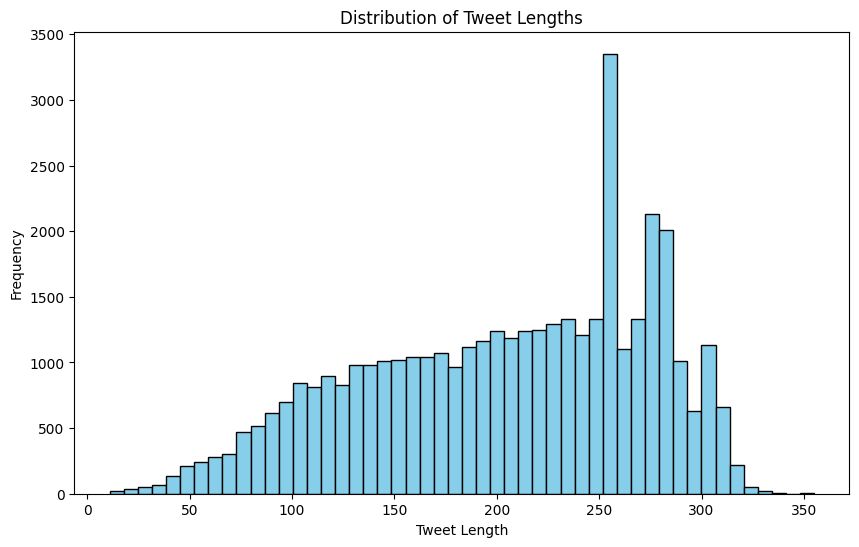

In [4]:
tweet_column = 'OriginalTweet'

# Calculate the length of each tweet and create a new column
Tweet_Length = data[tweet_column].apply(len)

# Plot the distribution of tweet lengths
plt.figure(figsize=(10, 6))
plt.hist(Tweet_Length, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

## Outliers

According to the obtained distributions, reason whether it is necessary to remove outliers or not. If your answer is yes, determine the appropriate remove range and delete these outliers in the dataset cleaning section. **(P1-3: 5 points)**

In [5]:
## I checked different variations with different models. result showed that it's not necessary
 # to remove outliers, but in the last section I normalized the data and actually I removed short length
 # data after preprocessing. 
# also there is a max length when doing padding in neural network section

## Missing Values

What percentage of dataset rows should be deleted due to missing values? Delete these row in the dataset cleaning section. **(P1-4: 2.5 points)**

In [6]:
# Count the number of missing values in each row
missing_values_per_row = data.isnull().sum(axis=1)

# Count the number of rows containing missing values
missing_rows = missing_values_per_row[missing_values_per_row > 0]
print(round(len(missing_rows) / len(data) * 100, 2), '%')


# most of this null values are not because of OriginalTweet column
# therfore just a small portion will get deleted


20.87 %


## Most Frequent Words

Use the `nltk` library and plot the 30 most frequent words in order of occurrence. Then do this for each set of positive, negative and neutral tweets separately. **(P1-5: 10 points)**

In [7]:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')

def filter(text):
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return filtered_tokens

# Apply the function to each row in the DataFrame
filtered = data['OriginalTweet'].apply(filter)
total_tokens = filtered.tolist()
flat_tokens = [word for sublist in total_tokens for word in sublist]

word_freq = FreqDist(flat_tokens)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


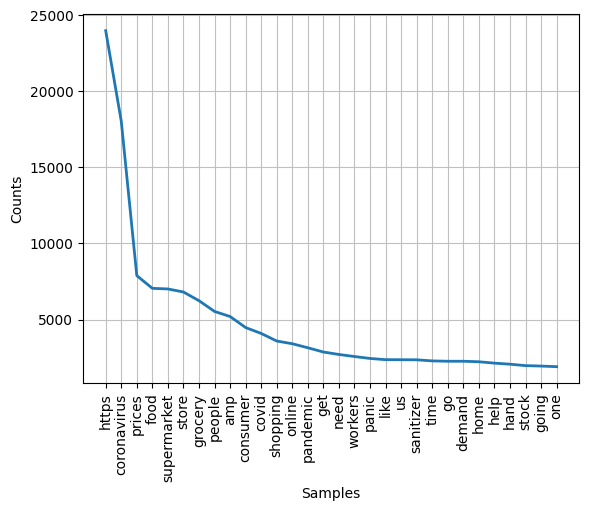

In [8]:
word_freq.plot(30, cumulative=False)

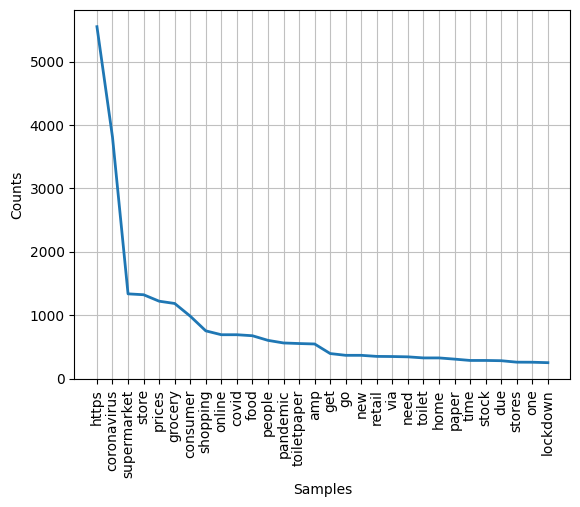

In [9]:
neutral_df = data[data['Sentiment'] == 'Neutral']
fil = neutral_df['OriginalTweet'].apply(filter)
total = fil.tolist()
flat_tokens = [word for sublist in total for word in sublist]
word_freq = FreqDist(flat_tokens)
word_freq.plot(30, cumulative=False)

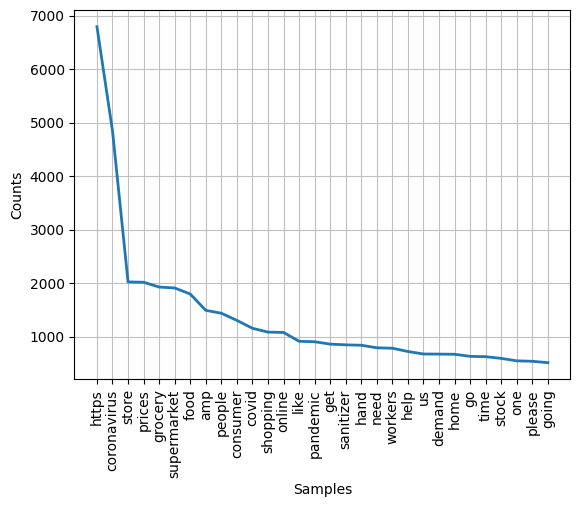

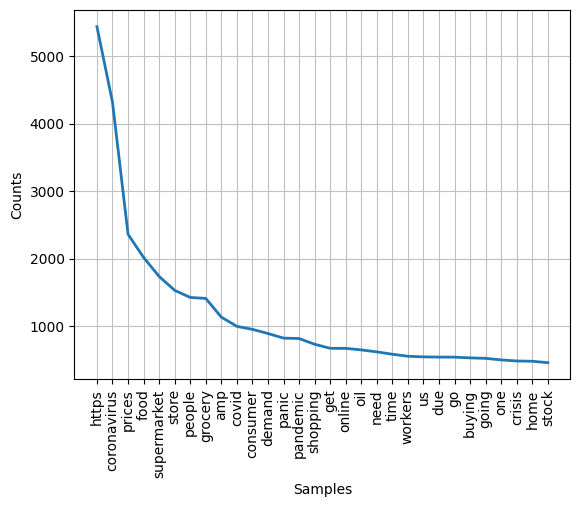

In [10]:
neutral_df = data[data['Sentiment'].astype(str) == 'Positive']
fil = neutral_df['OriginalTweet'].apply(filter)
total = fil.tolist()
flat_tokens = [word for sublist in total for word in sublist]
word_freq = FreqDist(flat_tokens)
word_freq.plot(30, cumulative=False)


neutral_df = data[data['Sentiment'].astype(str) == 'Negative']
fil = neutral_df['OriginalTweet'].apply(filter)
total = fil.tolist()
flat_tokens = [word for sublist in total for word in sublist]
word_freq = FreqDist(flat_tokens)
word_freq.plot(30, cumulative=False)

# P2: Preprocessing

## Dataset Cleaning

Remove unrelevant columns and do other necessary cleanings. **(P2-1: 5 points)**

In [11]:
data = data[['OriginalTweet', 'Sentiment']]
data

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


## Labeling

Based on the `Sentiment` column, generate 3 labels by considering the extremely positive tweets as positive and the extremely negative ones as negatives. **(P2-2: 2.5 points)**

In [12]:
def map_2_pn(text):
    if text == 'Extremely Negative':
        return 'Negative'
    elif text == 'Extremely Positive':
        return 'Positive'
    else:
        return text
    
data['Sentiment'] = data['Sentiment'].apply(map_2_pn)
data

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


## Text Cleaning

Remove urls from tweets with regex. (Use pattern `r'https?://\S+|www\.\S+'`) **(P2-3: 2.5 points)**

In [13]:
import re
import string
def remove_stopwords(words, stop):
    return [word for word in words if word not in stop_words]
def tokenize_text(text):
    return word_tokenize(text)
def remove(text, pattern):
    return  re.sub(pattern, '', text)
def join_text(words):
    return ' '.join(words)
def lower(text):
    return text.lower()
def stemmer(words, ps):
    return [ps.stem(word) for word in words]


def strip_all_entities(text): 
    text = str(text)
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [14]:
data['OriginalTweet'] = data['OriginalTweet'].apply(remove,pattern = r'https?://\S+|www\.\S+')
data['OriginalTweet'] = data['OriginalTweet'].apply(strip_all_entities)
data['OriginalTweet'] = data['OriginalTweet'].apply(clean_hashtags)
data['OriginalTweet'] = data['OriginalTweet'].apply(filter_chars)
data['OriginalTweet'] = data['OriginalTweet'].apply(remove_mult_spaces)
data

,OriginalTweet,Sentiment
0,and and,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia woolworths to give elder...,Positive
3,my food stock is not the only one which is emp...,Positive
4,me ready to go at supermarket during the covid...,Negative
...,...,...
41152,airline pilots offering to stock supermarket s...,Neutral
41153,response to complaint not provided citing covi...,Negative
41154,you know its getting tough when is rationing t...,Positive
41155,is it wrong that the smell of hand sanitizer i...,Neutral


Remove everything except alphabetical and numerical characters. (Use pattern `[^a-zA-Z0-9]`) **(P2-4: 2.5 points)**

In [15]:
data['OriginalTweet'] = data['OriginalTweet'].apply(remove, pattern = '[^a-zA-Z0-9\s]')
data

,OriginalTweet,Sentiment
0,and and,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia woolworths to give elder...,Positive
3,my food stock is not the only one which is emp...,Positive
4,me ready to go at supermarket during the covid...,Negative
...,...,...
41152,airline pilots offering to stock supermarket s...,Neutral
41153,response to complaint not provided citing covi...,Negative
41154,you know its getting tough when is rationing t...,Positive
41155,is it wrong that the smell of hand sanitizer i...,Neutral


Lower all letters. Then use `nltk` and tokenize tweets. Then replace each word with its root and remove the stopwords. **(P2-5: 10 points)**

In [16]:
data['OriginalTweet'] = data['OriginalTweet'].apply(lower)
data

,OriginalTweet,Sentiment
0,and and,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia woolworths to give elder...,Positive
3,my food stock is not the only one which is emp...,Positive
4,me ready to go at supermarket during the covid...,Negative
...,...,...
41152,airline pilots offering to stock supermarket s...,Neutral
41153,response to complaint not provided citing covi...,Negative
41154,you know its getting tough when is rationing t...,Positive
41155,is it wrong that the smell of hand sanitizer i...,Neutral


In [17]:
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

data['OriginalTweet'] = data['OriginalTweet'].apply(tokenize_text)
data['OriginalTweet'] = data['OriginalTweet'].apply(remove_stopwords, stop=stop_words)

ps = PorterStemmer()
data['OriginalTweet'] = data['OriginalTweet'].apply(stemmer, ps =ps)
data

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,OriginalTweet,Sentiment
0,[],Neutral
1,"[advic, talk, neighbour, famili, exchang, phon...",Positive
2,"[coronaviru, australia, woolworth, give, elder...",Positive
3,"[food, stock, one, empti, pleas, dont, panic, ...",Positive
4,"[readi, go, supermarket, covid19, outbreak, im...",Negative
...,...,...
41152,"[airlin, pilot, offer, stock, supermarket, she...",Neutral
41153,"[respons, complaint, provid, cite, covid19, re...",Negative
41154,"[know, get, tough, ration, toilet, paper, coro...",Positive
41155,"[wrong, smell, hand, sanit, start, turn, coron...",Neutral


In [18]:
data['OriginalTweet'] = data['OriginalTweet'].apply(join_text)
data

,OriginalTweet,Sentiment
0,,Neutral
1,advic talk neighbour famili exchang phone numb...,Positive
2,coronaviru australia woolworth give elderli di...,Positive
3,food stock one empti pleas dont panic enough f...,Positive
4,readi go supermarket covid19 outbreak im paran...,Negative
...,...,...
41152,airlin pilot offer stock supermarket shelv nz ...,Neutral
41153,respons complaint provid cite covid19 relat de...,Negative
41154,know get tough ration toilet paper coronaviru ...,Positive
41155,wrong smell hand sanit start turn coronaviru c...,Neutral


## Feature Generation

Use `CountVectorizer` class (belonging to `sklearn`) construct a feature vector from each tweet. **(P2-6: 5 points)**

In [19]:
from sklearn.model_selection import train_test_split
X = data['OriginalTweet'].values
y = data['Sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)
X_train_vect = vectorizer.fit_transform(X_train).toarray()
X_train_vect.shape

(32925, 1000)

In [21]:
X_test_vect = vectorizer.transform(X_test).toarray()
X_test_vect.shape

(8232, 1000)

In [22]:
import numpy as np
def mapping(x):
    if x == 'Negative':
        return 0
    elif x == 'Neutral':
        return 1
    elif x == 'Positive':
        return 2
    else:
        assert False, 'wrong labels!'
        
np_mapping = np.vectorize(mapping)
y_test = np_mapping(y_test)
y_train = np_mapping(y_train)

# P3: Modeling

Convert the dataset to a dataframe (or some `numpy` arrays) and split it into train and test sets. **(P3-1: 5 points)**

In [23]:
# already done

Use the `SVC` class (belonging to `sklearn`) to train a SVM classifier. (**P3-2: 5 points**)

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svc_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier on the training data
svc_classifier.fit(X_train_vect, y_train)

# Make predictions on the test data
y_pred = svc_classifier.predict(X_test_vect)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.76


Complete the definition of the following class to implement a SVM classifier capable of separating only the positive and negative classes. **(P3-3: 15 points)**


In [25]:
!pip install cvxopt
import numpy as np
from cvxopt import matrix, solvers

class SVM:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        
        P = matrix((np.outer(y, y) * np.dot(X, X.T)).astype(float))
        q = matrix(-np.ones((n_samples, 1)).astype(float))
        G = matrix((np.vstack((np.eye(n_samples) * (-1), np.eye(n_samples)))).astype(float))
        h = matrix((np.hstack((np.zeros(n_samples), np.ones(n_samples) * 0.1))).astype(float))
        A = matrix((y.reshape(1, -1)).astype(float))
        b = matrix(np.array([0.0]))

        sol = solvers.qp(P, q, G, h, A, b)

        alphas = np.array(sol['x'])

        sv = (alphas > 1e-4).flatten()
        self.alphas = alphas[sv]
        self.support_vectors = X[sv]
        self.support_vectors_labels = y[sv]

        self.weights = np.dot(self.alphas * self.support_vectors_labels.T, self.support_vectors)
        self.bias = np.mean(self.support_vectors_labels - np.dot(self.support_vectors, self.weights.T))

        return self

    def transform(self, X):
        approx = np.dot(X, self.weights.T) + self.bias
        return np.sign(approx)


  Obtaining dependency information for cvxopt from https://files.pythonhosted.org/packages/41/6d/98814860dbb9cdc27dcb6651b35124d7adca3bfe281f3351abb02a8a3f72/cvxopt-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 58.7 MB/s eta 0:00:00:00:0100:01


Train the binary SVM classifier using the class you have implemented. **(P3-4: 5 points)**

In [35]:
X_train_pn = X_train_vect[y_train != 1]
y_train_pn = y_train[y_train != 1]

X_test_pn = X_test_vect[y_test != 1]
y_test_pn = y_test[y_test != 1]

def tr(x):
    if x == 2:
        return 1
    return x

np_mapping = np.vectorize(tr)
y_train_pn = np_mapping(y_train_pn)
y_test_pn = np_mapping(y_test_pn)
print(y_train_pn.shape, y_train_pn[:10])

(26765,) [0 0 0 0 0 1 1 1 1 0]


In [36]:
s = 16000
X_train_pn = X_train_pn[:s]
y_train_pn = y_train_pn[:s]
X_test_pn = X_test_pn[:s]
y_test_pn = y_test_pn[:s]

In [37]:
model = SVM()
model.fit(X_train_pn, y_train_pn)

     pcost       dcost       gap    pres   dres
 0: -4.0711e+03 -2.7271e+03  7e+04  2e+01  6e-16
 1: -6.2921e+02 -2.5155e+03  3e+03  2e-01  3e-16
 2: -6.8228e+02 -8.1098e+02  1e+02  9e-03  7e-16
 3: -7.3962e+02 -7.4101e+02  2e+00  9e-05  3e-16
 4: -7.4019e+02 -7.4021e+02  2e-02  9e-07  3e-16
 5: -7.4020e+02 -7.4020e+02  2e-04  9e-09  3e-16
Optimal solution found.


# P4: Evaluation

Using the model you trained using `sklearn`, predict the labels of the test set. **(P4-1: 5 points)**

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.76


Using the model you trained from scratch, predict the labels of the test set. **(P4-2: 5 points)**

In [38]:
from sklearn.metrics import accuracy_score
model_pred = model.transform(X_test_pn)
model_pred = model_pred[:,0]

def tr(x):
    if x == -1:
        return int(0)
    return int(x)
mapping = np.vectorize(tr)
model_pred = mapping(model_pred)

In [41]:
accuracy = accuracy_score(model_pred, y_test_pn)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.69


Plot the normalized confusion matrix of the predictions for each model. **(P4-3: 5 points)**

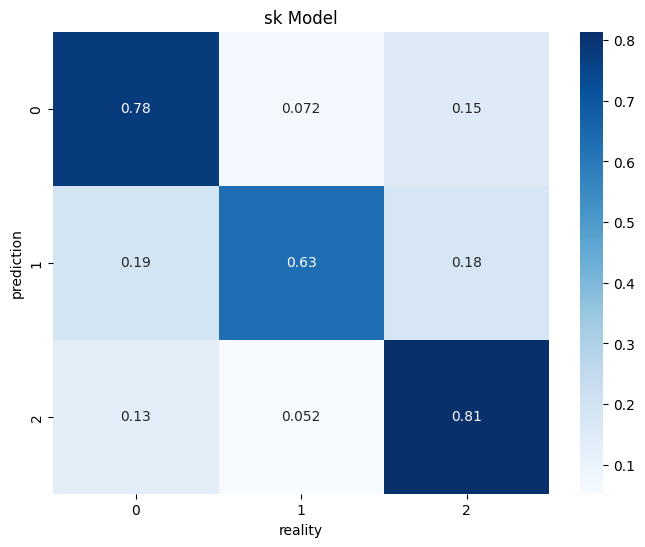

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sk_cm = confusion_matrix(y_pred, y_test, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(sk_cm, annot=True, cmap='Blues')
plt.xlabel('reality')
plt.ylabel('prediction')
plt.title('sk Model')
plt.show()

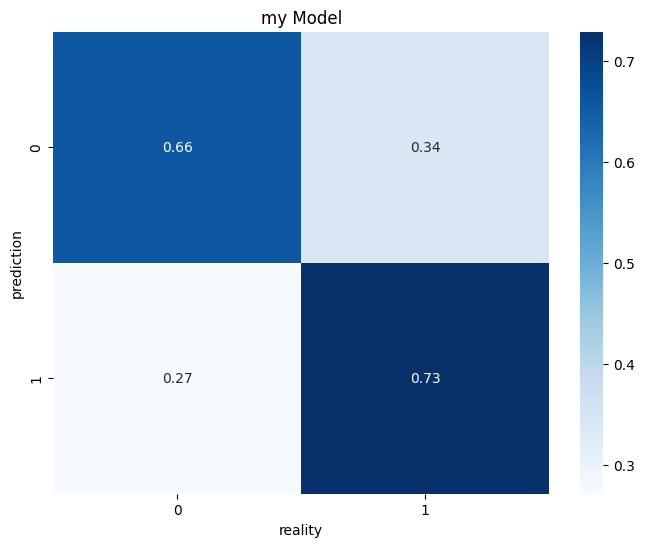

In [42]:
my_cm = confusion_matrix(model_pred, y_test_pn, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(my_cm, annot=True, cmap='Blues')
plt.xlabel('reality')
plt.ylabel('prediction')
plt.title('my Model')
plt.show()

# P5: Neural Net

Using all you have learned about neural networks, train a neural net to classify tweets as `[positive, negative, or neutral]` (**P5: 5 points**)

In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow.keras.layers as layer
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords

In [44]:
df_train, df_test = train_test_split(data, test_size=0.1, random_state=42)
X_c = df_train['OriginalTweet']
y = df_train['Sentiment']

In [45]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_c)

X = tokenizer.texts_to_sequences(X_c)
X = pad_sequences(X, padding='post')
vocab_size = len(tokenizer.word_index)+1

In [46]:
sentiments = {'Extremely Negative': 0,
            'Negative': 0,
            'Neutral': 1,
            'Positive':2,
            'Extremely Positive': 2
           }
y = y.map(sentiments)
labels = ['Negative', 'Neutral', 'Positive']


In [47]:

X_test = df_test['OriginalTweet'].copy()
y_test = df_test['Sentiment'].copy()

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, padding='post', maxlen = X.shape[1])

y_test = y_test.map(sentiments)

In [48]:
def generic_model(model_layer,units, epochs, bs):
    EPOCHS = epochs
    BATCH_SIZE = bs
    embedding_dim = 16

    model= tf.keras.Sequential([
        layer.Embedding(vocab_size, embedding_dim, input_length=X.shape[1]),
        model_layer(units,return_sequences = True),
        layer.GlobalMaxPooling1D(),
        layer.Dense(3,activation = 'softmax')
    ])
    
    model.summary()
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)

    model.compile(loss=SparseCategoricalCrossentropy(from_logits = False),
              optimizer='adam',metrics=['accuracy'])
            
    history = model.fit(X, y, epochs=EPOCHS, 
                        validation_split=0.15, batch_size=BATCH_SIZE,
                        callbacks = [callback])
    hist_model = pd.DataFrame(history.history)
    
    #Plot the loss and accuracy curves
    fig, ax = plt.subplots(2,1, figsize = (8,8))
    ax[0].plot(hist_model.loss, c = 'b')
    ax[0].plot(hist_model.val_loss, c = 'r')
    ax[0].set_title('Training and validation losses');
    ax[0].set_ylabel('Loss')
    ax[0].legend(['train', 'val'], loc='upper left')

    ax[1].plot(hist_model.accuracy, c = 'b')
    ax[1].plot(hist_model.val_accuracy, c = 'r')
    ax[1].set_title('Training and validation accuracies');
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['train', 'val'], loc='upper left')
    
    #Prediction
    pred = np.argmax(np.round(model.predict(X_test)),axis = 1)
    loss, acc = model.evaluate(X_test,y_test,verbose=0)
    print('Test loss: {}'.format(loss))
    print('Test Accuracy: {}'.format(acc))
    
                 
    #Confustion matrix
    confm = confusion_matrix(y_test, pred)
    cm= pd.DataFrame(confm, index = [i for i in labels],
                    columns = [i for i in labels])

    plt.figure(figsize = (8,6))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.show()
                
    return model, hist_model, loss, acc, cm

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 45, 16)            608240    
                                                                 
 lstm (LSTM)                 (None, 45, 15)            1920      
                                                                 
 global_max_pooling1d (Glob  (None, 15)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 3)                 48        
                                                                 
Total params: 610208 (2.33 MB)
Trainable params: 610208 (2.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/8
984/984 [==============================] - 29s 27ms/step - loss: 0.8382 - ac

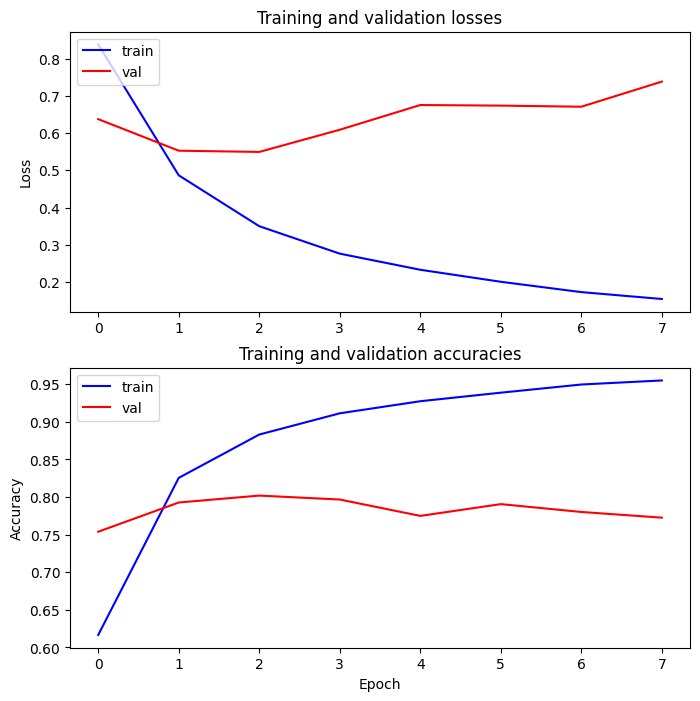

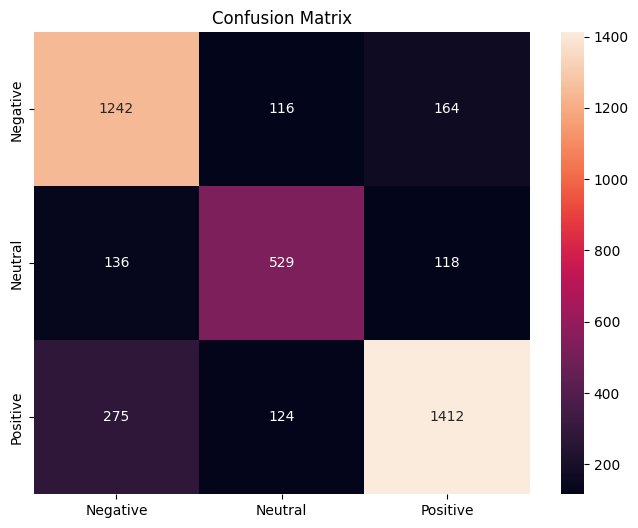

In [49]:
model_LSTM = generic_model(layer.LSTM,15, 8, 32)

# Competition

In [73]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


import re, string
import emoji
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix


In [74]:
import pandas as pd
df_train = pd.read_csv('/kaggle/input/pr4-train-comp/train.csv', encoding='ISO-8859-1')
df_train = df_train[['OriginalTweet', 'target']]
df_test = pd.read_csv('/kaggle/input/pr4-test-comp/test (3).csv', encoding='ISO-8859-1')
df_test = df_test[['OriginalTweet']]
print(len(df_train))
df_train = df_train.dropna()
print(len(df_train))

41159
41155


In [75]:
#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = str(text)
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [76]:
texts_new = []
for t in df_train.OriginalTweet:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(t)))))


In [77]:
texts_new_test = []
for t in df_test.OriginalTweet:
    texts_new_test.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(t)))))
    

In [78]:
df_train['text_clean'] = texts_new
df_test['text_clean'] = texts_new_test
df_train

,OriginalTweet,target,text_clean
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Negative,me ready to go at supermarket during the covid...
...,...,...,...
41154,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering to stock supermarket s...
41155,Response to complaint not provided citing COVI...,Negative,response to complaint not provided citing covi...
41156,You know itÃÂs getting tough when @KameronWi...,Positive,you know its getting tough when is rationing t...
41157,Is it wrong that the smell of hand sanitizer i...,Neutral,is it wrong that the smell of hand sanitizer i...


In [79]:
def get_len(x):
    return len(x.split())
df_train['len'] = df_train['text_clean'].apply(get_len)
df_train

,OriginalTweet,target,text_clean,len
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and,2
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,38
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,13
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,41
4,"Me, ready to go at supermarket during the #COV...",Negative,me ready to go at supermarket during the covid...,39
...,...,...,...,...
41154,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering to stock supermarket s...,11
41155,Response to complaint not provided citing COVI...,Negative,response to complaint not provided citing covi...,22
41156,You know itÃÂs getting tough when @KameronWi...,Positive,you know its getting tough when is rationing t...,16
41157,Is it wrong that the smell of hand sanitizer i...,Neutral,is it wrong that the smell of hand sanitizer i...,18


In [81]:
df_train = df_train[df_train['len'] > 2]
df_train

,OriginalTweet,target,text_clean,len
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,38
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,13
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,41
4,"Me, ready to go at supermarket during the #COV...",Negative,me ready to go at supermarket during the covid...,39
5,As news of the regionÃÂs first confirmed COV...,Positive,as news of the regions first confirmed covid19...,34
...,...,...,...,...
41154,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering to stock supermarket s...,11
41155,Response to complaint not provided citing COVI...,Negative,response to complaint not provided citing covi...,22
41156,You know itÃÂs getting tough when @KameronWi...,Positive,you know its getting tough when is rationing t...,16
41157,Is it wrong that the smell of hand sanitizer i...,Neutral,is it wrong that the smell of hand sanitizer i...,18


In [15]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [16]:
token_lens = []

for i,txt in enumerate(df_train['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    
df_train['token_lens'] = token_lens
df_train.head()

/tmp/ipykernel_47/2154655436.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['token_lens'] = token_lens


,OriginalTweet,target,text_clean,len,token_lens
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,38,42
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,13,20
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,41,57
4,"Me, ready to go at supermarket during the #COV...",Negative,me ready to go at supermarket during the covid...,39,56
5,As news of the regionÃÂs first confirmed COV...,Positive,as news of the regions first confirmed covid19...,34,41


In [17]:
df_train = df_train.sort_values(by='token_lens', ascending=False)
df_train.head()

,OriginalTweet,target,text_clean,len,token_lens
1638,ZÃÂ¡sah policie proti spekulant?m s rouÃÂka...,Neutral,zsah policie proti spekulantm s roukami na mj ...,39,100
37157,11 Nisan Cumartesi itibariyle ?BBÃÂnin tÃÂ¼...,Neutral,11 nisan cumartesi itibariyle bbnin tm hizmetl...,39,98
16632,Bir mÃÂ¼ddettir sÃÂ¼permarketlerin lojistik ...,Neutral,bir mddettir spermarketlerin lojistik hizmeti ...,36,92
13691,Hoy aplaudo a mi segunda familia #AplaudoANues...,Neutral,hoy aplaudo a mi segunda familia aplaudoanuest...,38,84
14593,"Na, wer war denn da am Werk? Gestern Nachmitta...",Negative,na wer war denn da am werk gestern nachmittag ...,37,80


In [68]:
df_train['target'] = df_train['target'].map({'Extremely Negative':0,'Negative':0,'Neutral':1,'Positive':2,'Extremely Positive':2})
# df_train

In [19]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df_train['text_clean']).reshape(-1, 1), np.array(df_train['target']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text_clean', 'target']);
train_os

,text_clean,target
0,zsah policie proti spekulantm s roukami na mj ...,1
1,11 nisan cumartesi itibariyle bbnin tm hizmetl...,1
2,bir mddettir spermarketlerin lojistik hizmeti ...,1
3,hoy aplaudo a mi segunda familia aplaudoanuest...,1
4,na wer war denn da am werk gestern nachmittag ...,0
...,...,...
54106,now more than half of states have closed dinin...,1
54107,covid19 outbreak lets spread the message covid...,1
54108,distributors of the tata group firm will list ...,1
54109,my local store actually had one package of tp ...,1


In [20]:
X = train_os['text_clean'].values
y = train_os['target'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
X_test = df_test['text_clean'].values

In [21]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()


In [22]:
MAX_LEN=128
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [23]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [24]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [25]:
def create_model(bert_model, max_len=MAX_LEN):
    
    ##params###
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    embeddings = bert_model([input_ids,attention_masks])[1]
    
    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    
    model.compile(opt, loss=loss, metrics=accuracy)
    
    
    return model

In [26]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_1[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_2[0][0]']             
                             hidden_state=(None, 128, 7                                           
                             68),                                                             

In [27]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=32)

Epoch 1/4
1522/1522 [==============================] - 754s 484ms/step - loss: 0.5679 - categorical_accuracy: 0.7745 - val_loss: 0.3526 - val_categorical_accuracy: 0.8769
Epoch 2/4
1522/1522 [==============================] - 735s 483ms/step - loss: 0.2959 - categorical_accuracy: 0.8940 - val_loss: 0.2657 - val_categorical_accuracy: 0.9047
Epoch 3/4
1522/1522 [==============================] - 735s 483ms/step - loss: 0.1982 - categorical_accuracy: 0.9312 - val_loss: 0.2121 - val_categorical_accuracy: 0.9254
Epoch 4/4
1522/1522 [==============================] - 735s 483ms/step - loss: 0.1390 - categorical_accuracy: 0.9521 - val_loss: 0.2162 - val_categorical_accuracy: 0.9307


In [28]:
result_bert = model.predict([test_input_ids,test_attention_masks])

119/119 [==============================] - 23s 163ms/step


In [29]:
result_bert

array([[9.7568184e-01, 1.1479338e-02, 1.2838851e-02],
       [4.4023930e-03, 2.1613438e-03, 9.9343634e-01],
       [3.0372723e-04, 7.0088130e-04, 9.9899536e-01],
       ...,
       [1.0483215e-03, 9.9817657e-01, 7.7509688e-04],
       [9.9689281e-01, 7.7186903e-04, 2.3353293e-03],
       [3.2974032e-04, 6.9302035e-04, 9.9897730e-01]], dtype=float32)

In [30]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

In [41]:
res = ['' for i in range(len(y_pred_bert))]
for i, x in enumerate(y_pred_bert):
    if int(x[0]) == 1:
        res[i] = 'Negative'
    elif int(x[1]) == 1:
        res[i] = 'Neutral'
    else:
        res[i] = 'Positive'
        

In [42]:
df = pd.DataFrame(np.array(res), columns=['target'])
df.insert(0, 'ID', range(len(df)))

df.to_csv("res.csv")